In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Distance matrix in a 3D ellipsoid

In [2]:
# Number of vertices
number_of_vertices = 1000

# Semi-axes a, a, c of the ellipsoid
a, c = 0.3, 0.5

# Filenames for data
matrix_rootname = "../data/synthetic/synthetic_correlation_matrices/correlation-matrix-00-{:05d}x{:05d}-profile-{:02d}.txt"
figure_rootname = "../figures/synthetic_correlation_matrices/profiles{}.pdf"
coordinates_filename = "../data/synthetic/synthetic_correlation_matrices/coordinates-00.txt"
distance_matrix_filename = "../data/synthetic/synthetic_correlation_matrices/distance-matrix-00.txt"

In [3]:
# Generates a grid of evenly spaced points in the unit cube centered at the origin
number_of_points = 51
x = np.linspace(-0.5, 0.5, number_of_points)
xs = np.array(np.meshgrid(x, x, x))
coordinates = np.transpose(xs.reshape((3,-1)))
coordinates[:, [0, 1]] = coordinates[:, [1, 0]]

# Keeps 'number_of_vertices' points that are within a ellipsoid with semi-axes a, a, c
coordinates = coordinates[np.where((coordinates[:, 0] / a) ** 2 + (coordinates[:, 1] / a) ** 2 + (coordinates[:, 2] / c) ** 2 <= 1)[0]]
assert len(coordinates) >= number_of_vertices, "Not enough points in ellipsoid"
coordinates = coordinates[np.random.choice(coordinates.shape[0], number_of_vertices, replace=False)]
np.savetxt(coordinates_filename, coordinates, fmt='%.6f')

# Builds the distance matrix
x = coordinates[:, 0]
y = coordinates[:, 1]
z = coordinates[:, 2]
distance_matrix = np.sqrt(np.square(x - x[:, np.newaxis]) + np.square(y - y[:, np.newaxis]) + np.square(z - z[:, np.newaxis]))
np.savetxt(distance_matrix_filename, distance_matrix, fmt='%.6f')

min_distance = 0
max_distance = 2 * c

normalized_distance_matrix = (distance_matrix - min_distance) / (max_distance - min_distance)
x = normalized_distance_matrix

### Distance-correlation profiles

In [4]:
# Housekeeping variables
xx = np.linspace(0, 1, 1001)
idx = 0

#### Linear profiles

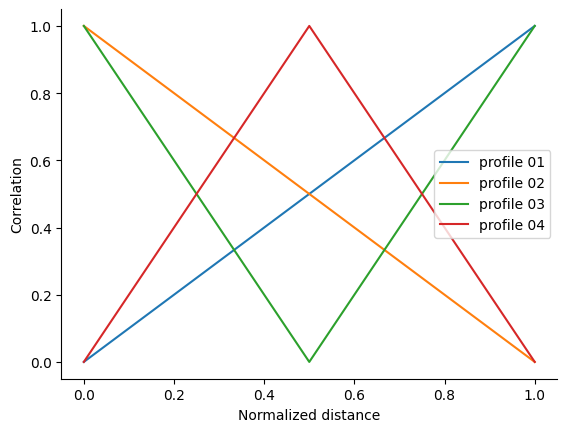

In [5]:
fig, ax = plt.subplots()

profiles = ""

idx += 1
profiles += "-{:02d}".format(idx)
y  = x
yy = xx
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = 1 - x
yy = 1 - xx
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = np.abs(2 * x  - 1)
yy = np.abs(2 * xx - 1)
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = 1 - np.abs(2 * x  - 1)
yy = 1 - np.abs(2 * xx - 1)
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

ax.set_xlabel("Normalized distance")
ax.set_ylabel("Correlation")

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.legend()
fig.savefig(figure_rootname.format(profiles))

#### Exponential profiles

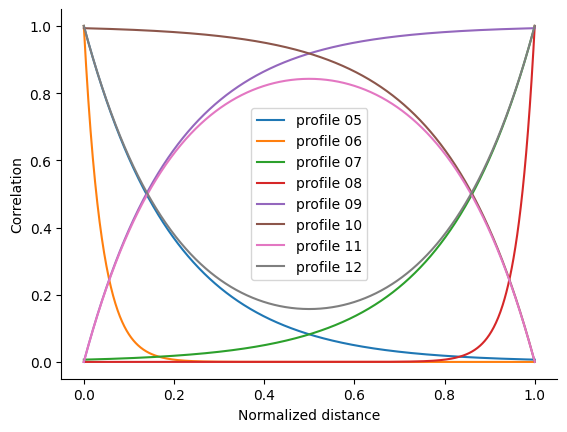

In [6]:
fig, ax = plt.subplots()

profiles = ""

idx += 1
profiles += "-{:02d}".format(idx)
y  = np.exp(-5 * x)
yy = np.exp(-5 * xx)
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = np.exp(-25 * x)
yy = np.exp(-25 * xx)
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = np.exp(-5 * (1 - x))
yy = np.exp(-5 * (1 - xx))
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = np.exp(-25 * (1 - x))
yy = np.exp(-25 * (1 - xx))
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = 1 - np.exp(-5 * x)
yy = 1 - np.exp(-5 * xx)
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = 1 - np.exp(-5 * (1 - x))
yy = 1 - np.exp(-5 * (1 - xx))
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = (1 - np.exp(-5 * x))  * (1 - np.exp(-5 * (1 - x)))
yy = (1 - np.exp(-5 * xx)) * (1 - np.exp(-5 * (1 - xx)))
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = 1 - (1 - np.exp(-5 * x))  * (1 - np.exp(-5 * (1 - x)))
yy = 1 - (1 - np.exp(-5 * xx)) * (1 - np.exp(-5 * (1 - xx)))
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

ax.set_xlabel("Normalized distance")
ax.set_ylabel("Correlation")

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.legend()
fig.savefig(figure_rootname.format(profiles))

#### Gaussian profiles

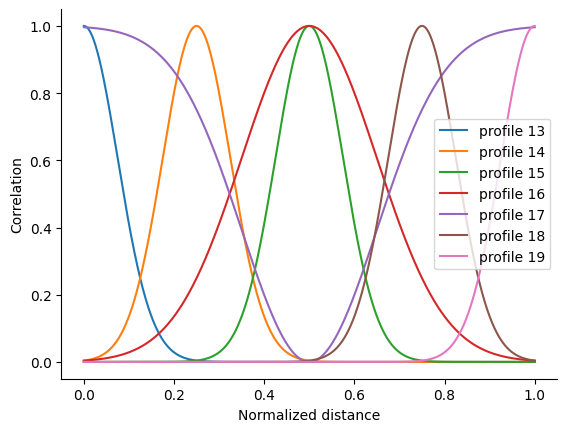

In [7]:
fig, ax = plt.subplots()

profiles = ""

idx += 1
profiles += "-{:02d}".format(idx)
y  = np.exp(-0.5 *  ((x - 0.00)  / 0.075)**2)
yy = np.exp(-0.5 *  ((xx - 0.00) / 0.075)**2)
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = np.exp(-0.5 *  ((x - 0.25)  / 0.075)**2)
yy = np.exp(-0.5 *  ((xx - 0.25) / 0.075)**2)
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = np.exp(-0.5 *  ((x - 0.50)  / 0.075)**2)
yy = np.exp(-0.5 *  ((xx - 0.50) / 0.075)**2)
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = np.exp(-0.5 *  ((x - 0.50)  / 0.15)**2)
yy = np.exp(-0.5 *  ((xx - 0.50) / 0.15)**2)
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = 1 - np.exp(-0.5 *  ((x - 0.50)  / 0.15)**2)
yy = 1 - np.exp(-0.5 *  ((xx - 0.50) / 0.15)**2)
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = np.exp(-0.5 *  ((x - 0.75)  / 0.075)**2)
yy = np.exp(-0.5 *  ((xx - 0.75) / 0.075)**2)
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

idx += 1
profiles += "-{:02d}".format(idx)
y  = np.exp(-0.5 *  ((x - 1.00)  / 0.075)**2)
yy = np.exp(-0.5 *  ((xx - 1.00) / 0.075)**2)
y[np.diag_indices_from(y)] = 1
np.savetxt(matrix_rootname.format(number_of_vertices, number_of_vertices, idx), y, fmt='%.6f')
ax.plot(xx, yy, label="profile {:02d}".format(idx))

ax.set_xlabel("Normalized distance")
ax.set_ylabel("Correlation")

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.legend()
fig.savefig(figure_rootname.format(profiles))